# Evaluating Earthquake Damage in Nepal 

TODO: Complete Executive Summary

The culminating task for the [Microsoft Professional Program in Data Science](https://academy.microsoft.com/en-us/professional-program/tracks/data-science/) is to develop a report for a machine learning task which highlights the full cycle of data analysis from exploratory data analysis, to statistical modeling, and finally communicating those results.  In this task we will use building location and construction to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.  This data is provided by [DrivenData](https://www.drivendata.org/).

## Exploratory Data Analysis

The goals of our exploration are in part informed by the questions that are being asked as part of the program, however generally of course we would like to try to discover which variables contain a lot of information.  One approach I will use as a part of my feature engineering is use FeatureTools, which will hopefully improve the quality of our results.  We will want to explore multiple different approaches to this problem. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Training examples and labels are already split for us.  A quick check of the building_id variables
# confirms that they are ordered the same
data = pd.read_csv("data/train_values.csv")
labels = pd.read_csv("data/train_labels.csv")
# We'll merge the dataset for come convenience when visualizing
merged = data.merge(labels)
# The Test Data set
test = pd.read_csv("data/test_values.csv")

In [3]:
data.shape

(10000, 39)

### Exploring the Distributions of Each Variable

I have a few things that I want to understand about a distribution when getting started on a project:
  * What are the distributions of each variable?
  * How are the features correllated with the response variable?
  * How are the feature correllated with each other?
  * Are there missing values?
  
#### Distributions of each variable

From these histograms I notice several things.  We have a mix of categorical and numeric variables which describe building attributes (like how tall it is), how it is used (industry, etc...), and its locations.  

Building Attributes:
  * age
  * area
  * has_superstructure
  * height
  * count_floors_pre_eq
  * land_surface_condition
  * foundation_type
  * roof_type
  * ground_floor_type
  * other_floor_type
  
Building Use:
  * legal_ownership_status
  * has_secondary_use
  * count_families

Building Location:
  * geo_level_1_id
  * geo_level_2_id
  * geo_level_3_id
  * land_surface_condition
  * position
  * plan_configuration


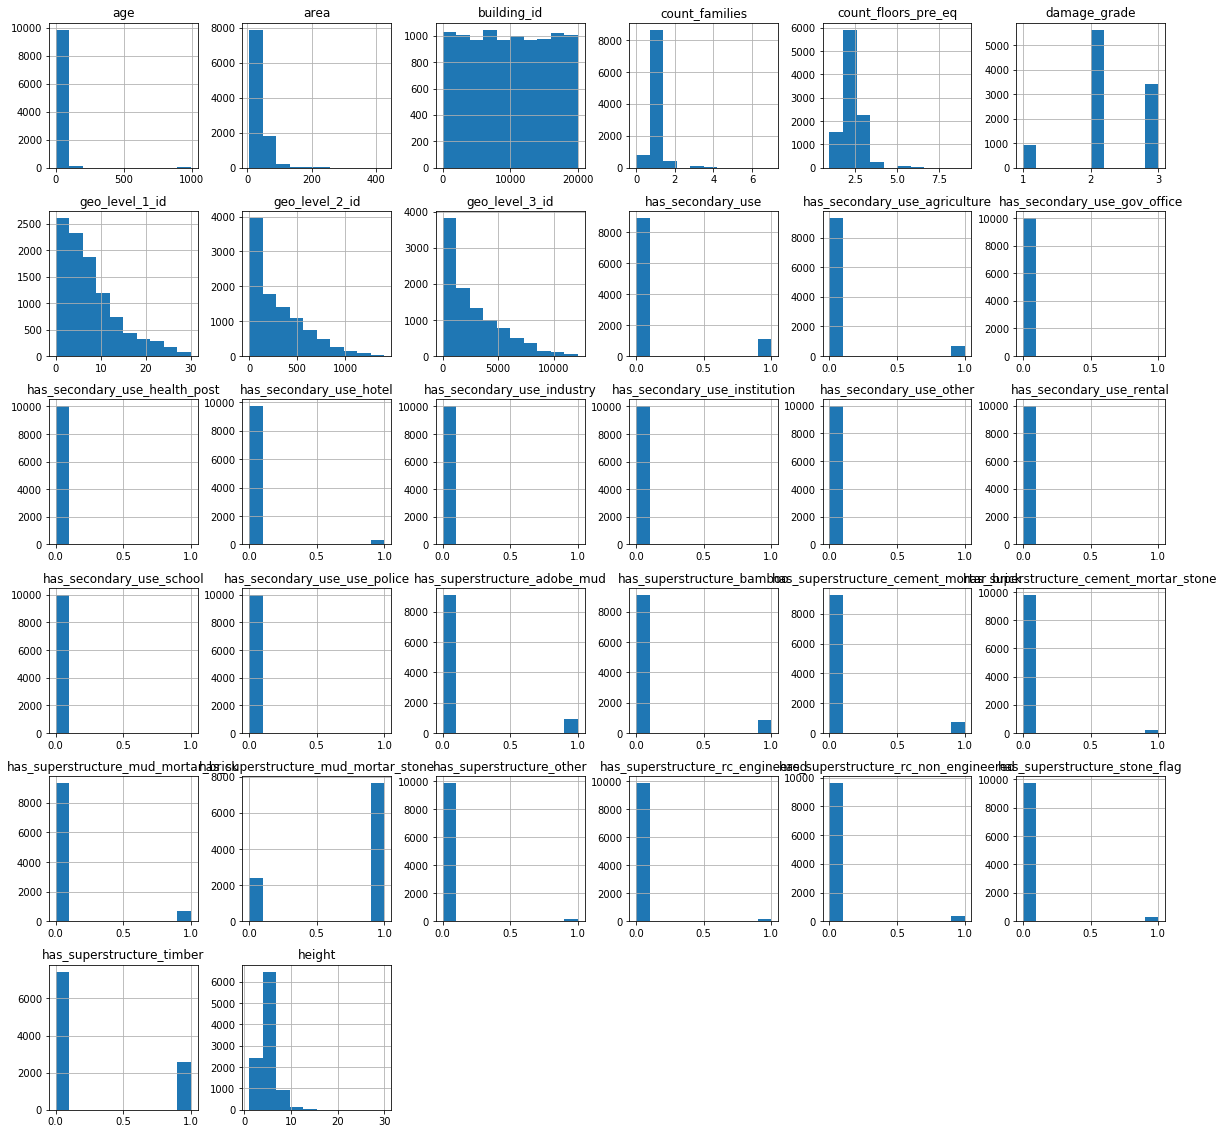

In [4]:
merged.hist(figsize=(20, 20))
plt.show()

#### Correlation

First we display the pearson r values for damage grade with each other variable.  Then we display the correlation matrix for all variables in a headmap.  A few things to notice, that certain super structures seem to be highly corrlated with higher (adobe, stone) or lower (cement/rc) damage grades.  Area also is clearly negative and floor count is clearly positive.  The rest are pretty close to zero and may or may not be important. 

has_superstructure_cement_mortar_brick   -0.233398
has_superstructure_rc_engineered         -0.179761
has_superstructure_rc_non_engineered     -0.156371
area                                     -0.114775
has_secondary_use                        -0.087286
has_secondary_use_hotel                  -0.085269
has_superstructure_timber                -0.080558
has_superstructure_cement_mortar_stone   -0.073337
has_superstructure_bamboo                -0.072327
geo_level_1_id                           -0.064084
has_secondary_use_rental                 -0.063367
has_secondary_use_school                 -0.041652
has_secondary_use_other                  -0.031927
has_secondary_use_institution            -0.029296
has_superstructure_other                 -0.019515
has_secondary_use_gov_office             -0.017306
has_secondary_use_agriculture            -0.013333
has_secondary_use_industry               -0.011504
building_id                              -0.008632
geo_level_2_id                 

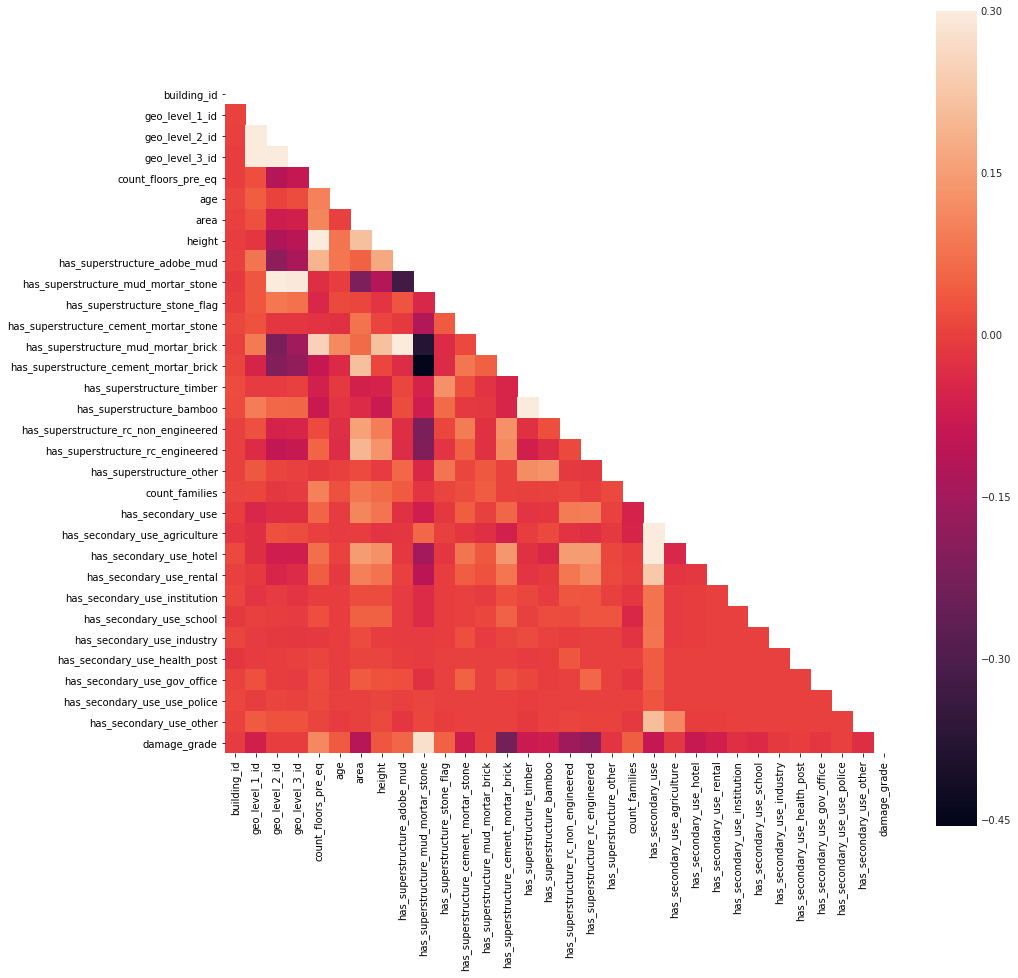

In [5]:
f, axs = plt.subplots(1, figsize=(15, 15))
cor = merged.corr()
print(cor['damage_grade'].sort_values())
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(cor, mask=mask, vmax=.3, square=True, ax=axs)
plt.show()

#### Missing Values

We can do simple checks for missing values by, for example, summing up the counts of NaNs in each column.  It seems like we are safe from missing values so far.

In [6]:
merged.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area                                      0
height                                    0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

### Cross Variable Comparisons

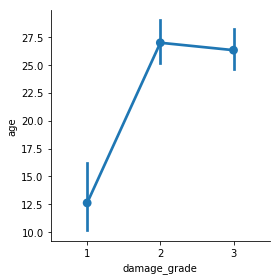

In [7]:
# How does Building Age correspond to damage grade?
sns.factorplot(x="damage_grade", y="age", data=merged)
# Observe that the average age for 1st grade damage was significantly lower than 2's and 3's. 

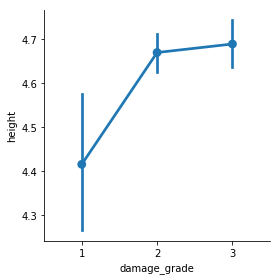

In [8]:
# Building Height versus Damage Grade
sns.factorplot(x="damage_grade", y="height", data=merged)
# Building height for grade 1's was slightly lower, though perhaps not significantly different 
# from 2's and 3's.  Maybe 2's and 3's contain more outliers though.

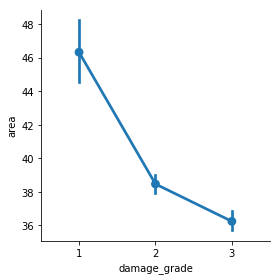

In [9]:
# Building Area versus Damage Grade
sns.factorplot(x="damage_grade", y="area", data=merged)
# We notice that lower damage grades seem to correspond to 

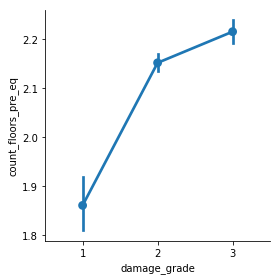

In [10]:
# Building Area versus Damage Grade
sns.factorplot(x="damage_grade", y="count_floors_pre_eq", data=merged)
# We notice that lower damage grades seem to correspond to

In [11]:
merged[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']].head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id
0,8,501,3237
1,7,288,1819
2,14,36,838
3,8,81,805
4,23,380,4266


In [12]:
len(merged['geo_level_3_id'].unique())

5172

### Learnings from Exploratory Data Analysis

##### Damage Grade Seperation

Our ultimate task is to try to differentiate examples into damages grades 1, 2, or 3.  Our visualization of some variables suggests that perhaps grades 1 and 2/3 are fairly easy to seperate, but the seperation between 2 and 3 seems to be the more challenging task.

##### Location Data

In this task location data is given in a non-traditional way.  We are given ids which correspond to increasingly granular location ids.  However, there is no reason to believe that the numeric values are actually meaningful.  Therefore, these values are really categorical in nature.  This is likely where we will get the most use out of Feature Tools.

### Feature Engineering with Feature Tools

Okay, we'll now utilize the Feature Tools package to prepare our data for machine learning.

In [15]:
import featuretools as ft

In [16]:
def build_es(data):
    # Feature tools will do its best auto detect the dtypes of our variables.  However we'll need to make some corrections.
    dtypes = {
        'geo_level_2_id': ft.variable_types.Categorical,
        'geo_level_3_id': ft.variable_types.Categorical,
        'damage_grade': ft.variable_types.Categorical,
        'has_superstructure_adobe_mud': ft.variable_types.Boolean,
        'has_superstructure_mud_mortar_stone': ft.variable_types.Boolean, 
        'has_superstructure_stone_flag': ft.variable_types.Boolean,
        'has_superstructure_cement_mortar_stone': ft.variable_types.Boolean,
        'has_superstructure_mud_mortar_brick': ft.variable_types.Boolean,
        'has_superstructure_cement_mortar_brick': ft.variable_types.Boolean, 
        'has_superstructure_timber': ft.variable_types.Boolean,
        'has_superstructure_bamboo': ft.variable_types.Boolean, 
        'has_superstructure_rc_non_engineered': ft.variable_types.Boolean,
        'has_superstructure_rc_engineered': ft.variable_types.Boolean, 
        'has_superstructure_other': ft.variable_types.Boolean,
        'has_secondary_use': ft.variable_types.Boolean,
        'has_secondary_use_agriculture': ft.variable_types.Boolean, 
        'has_secondary_use_hotel': ft.variable_types.Boolean,
        'has_secondary_use_rental': ft.variable_types.Boolean,
        'has_secondary_use_institution': ft.variable_types.Boolean,
        'has_secondary_use_school': ft.variable_types.Boolean, 
        'has_secondary_use_industry': ft.variable_types.Boolean,
        'has_secondary_use_health_post': ft.variable_types.Boolean, 
        'has_secondary_use_gov_office': ft.variable_types.Boolean,
        'has_secondary_use_use_police': ft.variable_types.Boolean, 
        'has_secondary_use_other': ft.variable_types.Boolean
    }
    
    # Start be definng an EntitySet.  This abstractly contains all data we'll use to train the model, potentially in multiple tables. 
    es = ft.EntitySet(id="Buildings")

    merged.reset_index(inplace=True)
    # With the container defined, we'll add our data
    es = es.entity_from_dataframe(entity_id='buildings',
                                  dataframe=merged,
                                  variable_types=dtypes,
                                  index="index")

    # This method will generate a new entity for each entry in Geo 1.  Since
    # earthquake damage will likely be very related to location, we'll want to 
    # try to leverage location data in this way. 
    es = es.normalize_entity(base_entity_id="buildings",
                             new_entity_id="geo_1",
                             index="geo_level_1_id")

    # This method will traverse our categorical variables and identify interesting values to construct
    # where variables from
    es.add_interesting_values(max_values=50, verbose=False)

    return es

In [17]:
es = build_es(merged)

In [18]:
from featuretools.primitives import (Mean, Count, Skew, Sum, Std, PercentTrue, Mode, CumSum,
                                     CumCount, CumMean, Median)

# Yields our base feature matrix and defs
base_mat, base_defs = ft.dfs(entityset=es,
                               target_entity='buildings',
                               agg_primitives=[],
                               max_depth=1)

# Generates many features based on each entry in geo_1.  This hopefully captures important geographic features.
geo_1_mat, geo_1_defs = ft.dfs(entityset=es,
                               target_entity='geo_1',
                               agg_primitives=[Mean, Skew, Sum, Std, PercentTrue, Mode],
                               where_primitives=[Sum, Count, Mean, PercentTrue],
                               max_depth=3)

In [19]:
basemat_encoded, base_encoded = ft.encode_features(base_mat, base_defs, include_unknown=False, top_n=1000,
                                                   to_encode=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
                                                              'land_surface_condition', 'foundation_type',
                                                              'roof_type', 'ground_floor_type', 'other_floor_type',
                                                              'position', 'plan_configuration', 'legal_ownership_status'])
geomat_encoded, geo_encoded = ft.encode_features(geo_1_mat, geo_1_defs, top_n=1000, include_unknown=False)
geomat_encoded.reset_index(inplace=True)

In [20]:
# Our base dataset without extra geo features
base = basemat_encoded.drop(['building_id'], axis=1)
# Added geo features
base_with_geo = merged[['building_id', 'geo_level_1_id']].merge(basemat_encoded).merge(geomat_encoded).drop(['building_id', 'geo_level_1_id'], axis=1)

### Feature Preparation

Now that we've generated a bunch of potentially useful features, we need apply the last few steps of cleaning to our dataset. 

This will include:
  * Ensuring all columns are normalized
  * Dropping features which contribute to noise (ids)
  * Dropping any columns which are all a single value
  
We utilized code from this blog post on pipelines for scikit learn, in particular to get this nice ability to give and return pandas dataframes.

#### Addressing Class Imbalance Problem

We noticed in the data that there is a severe class imbalance problem.  Class 2 is easily the largest, follow by class 3 which is about 50% of class 2 and class 1 which is about 15% the size of class 2. There are a number of approaches to this problem to consider:

  1. Undersample
  2. Oversample
  3. Penalize weights
    * Our model's accuracy actually decreased with the strategy.  We succeeded in labeling 
  
1 and 2 will be facilitated by the imbalance-learn python package, and weight penalization is natively supported by many scikit-learn models.  

If these three methods don't get us close enough, we could also try breaking up this problem.  That is, first trying to predict class 1's with one model, and then trying to differentiate class 2 and 3's with a second.  I am often of the opinion that is better to try to get a single model to learn those more complex relationships, but so far that doesn't seem to be happening.

In [ ]:
base[base.damage_grade == 3].shape

In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

def preprocessing(data):
    X, y = data.drop('damage_grade', axis=1), data['damage_grade']
    # At this point, any NA's can just be filled with 0.  
    X.fillna(0, inplace=True)
    # Drop columns which have no information value
    # X = drop_unused(X)
    # Drop any columns which only have a single value
    X = drop_trivial(X)
    # Scale our numeric cols
    X = norm_cols(X)
    return X, y

def drop_trivial(data):
    """If a column only has 1 value, drop it"""
    for col in data.columns:
        if len(data[col].unique()) == 1:
            data.drop(col,inplace=True,axis=1)            
    return data

def drop_unused(data):
    cols = ['building_id']
    return data.drop(cols, axis=1)

def norm_cols(data):
    # Identify columns in need of scaling by those who have more than two values
    numeric = data.loc[:, (data.apply(lambda x: len(x.unique())) > 2).values].columns
    scaler = RobustScaler()
    scaled = pd.DataFrame(scaler.fit_transform(data[numeric]), columns=numeric)
    for column in numeric:
        data[column] = scaled[column]
    return data

In [22]:
X, y = preprocessing(base)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y)

X_g, y_g = preprocessing(base_with_geo)
Xgeo_train, Xgeo_test, ygeo_train, ygeo_test = train_test_split(X, y, train_size=0.75, stratify=y)

C:\Users\perus\AppData\Local\Continuum\Anaconda3\envs\bayes\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Statistical Modeling

Our strategy for statistical modeling is to iteratively build and improve our models.  I will first write a few functions which will help with scoring and cross validation.  Cross validation will be key in testing models progressively and having a sembelance of confidence that we are making progress.

In addition to trying different models, we will also have to go back into our data and adjust our feature engineering.  The features from feature tools did seem to be helpful in adding a little accuracy.

In [23]:
# Since we are being score on f1_score, we'll use this as our main measure of model fit
from sklearn.metrics import f1_score
# This filter method will help when we have a lot of features.  We will also want to try
# PCA or some other form of dimensionality reduction as well. 
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.linear_model import SGDClassifier

def score_model(model, X, y):
    # given model and some data, we can score using f1_micro
    predictions = model.predict(X)
    score = f1_score(y_true=y, y_pred=predictions, average='micro')
    return score

def cross_validate(model, X, y, n_folds=5, oversample=False):
    skf = StratifiedKFold(n_folds)
    training_scores = []
    validation_scores = []
    for ts, vs in skf.split(X, y):
        xt, yt = X.iloc[ts, :], y.iloc[ts]
        xv, yv = X.iloc[vs, :], y.iloc[vs]
        if oversample:
            xt, yt = RandomOverSampler().fit_sample(xt, yt)
        model.fit(xt, yt)
        training_scores.append(score_model(model, xt, yt))
        val_score = score_model(model, xv, yv)
        print(val_score)
        validation_scores.append(val_score)
    training_scores = np.array(training_scores)
    validation_scores = np.array(validation_scores)
    print(f"Training Error was distributed with mean:{training_scores.mean()}, std: {training_scores.std()}")
    print(f"Validation Error was distributed with mean:{validation_scores.mean()}, std: {validation_scores.std()}")  
    
def plot_error_by_class(model, X, y):
    testing = X.copy()
    testing['preds'] = model.predict(X)
    testing['actual'] = y
    testing['correct'] = np.where(testing.preds == testing.actual, 1, 0)

    # Our accuracy for each class
    # Clearly the class imbalance problem 
    sns.factorplot(x="actual", y='correct', data=testing)
    plt.show()

In [24]:
logit_model = SGDClassifier(loss='log', penalty='elasticnet', max_iter=1000000, tol=1e-12, alpha=0.0001, l1_ratio=0.55)
cross_validate(logit_model, X_train, y_train, n_folds=10, oversample=False)

0.7083888149134487
0.6924101198402131
0.6844207723035952
0.6644474034620506
0.5733333333333334
0.672
0.656
0.6835781041388518
0.6822429906542056
0.679144385026738
Training Error was distributed with mean:0.7546077380589346, std: 0.027368697353258874
Validation Error was distributed with mean:0.6695965923672436, std: 0.03489326175753937


In [63]:
score_model(logit_model, X_test, y_test)

0.678

In [64]:
cross_validate(logit_model, Xgeo_train, ygeo_train, n_folds=10, oversample=False)

0.6657789613848203
0.6897470039946738
0.7123834886817576
0.648
0.6013333333333334
0.668
0.6586666666666666
0.6835781041388518
0.650200267022697
0.6488651535380507
Training Error was distributed with mean:0.7531110333954767, std: 0.025312493554421684
Validation Error was distributed with mean:0.6626552978760851, std: 0.028318380218872872


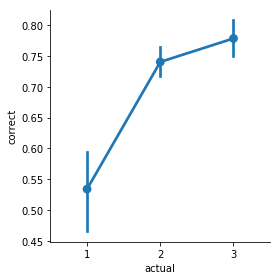

In [65]:
plot_error_by_class(logit_model, X_test, y_test)

## Support Vector Machine  

In [62]:
from sklearn.svm import SVC
svm = SVC(tol=1e-10, kernel='rbf', max_iter=100000)
cross_validate(svm, X_train, y_train, n_folds=2, oversample=False)

0.39429485470541187


KeyboardInterrupt: 

In [ ]:
cross_validate(svm, Xgeo_train, ygeo_train, n_folds=10, oversample=False)

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
trees = RandomForestClassifier(n_estimators=30, max_features=50, max_depth=64)
cross_validate(trees, X_train, y_train, n_folds=10, oversample=False)

0.6937416777629827
0.6857523302263648
0.6697736351531292
0.6551264980026631
0.6653333333333333
0.6626666666666666
0.6546666666666666
0.6969292389853138
0.6929238985313751
0.6778074866310161
Training Error was distributed with mean:0.9584442789578679, std: 0.0033698547470370844
Validation Error was distributed with mean:0.6754721431959511, std: 0.015349086331327953


In [45]:
cross_validate(trees, Xgeo_train, ygeo_train, n_folds=10, oversample=False)

0.6790945406125166
0.6711051930758988
0.6737683089214381
0.6746666666666666
0.6706666666666666
0.6786666666666666
0.6533333333333333
0.6662216288384513
0.6355140186915887
0.684913217623498
Training Error was distributed with mean:0.9602224675207696, std: 0.004137236613104006
Validation Error was distributed with mean:0.6687950241096725, std: 0.013728389455022933


In [49]:
score_model(trees, X_test, y_test)

0.6732

In [52]:
score_model(trees, Xgeo_test, ygeo_test)

0.8671999999999999

# Ensemble Methods

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

booster = AdaBoostClassifier(logit_model)
cross_validate(booster, X_train, y_train, n_folds=5)